In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [73]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','target'])
iris.loc[60]

sepal length                  5
sepal width                   2
petal length                3.5
petal width                   1
target          Iris-versicolor
Name: 60, dtype: object

Noramlize data

In [74]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

iris_data = iris.loc[:, features].values
iris_names = iris.loc[:,['target']].values

#scaled data
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)


PCA 

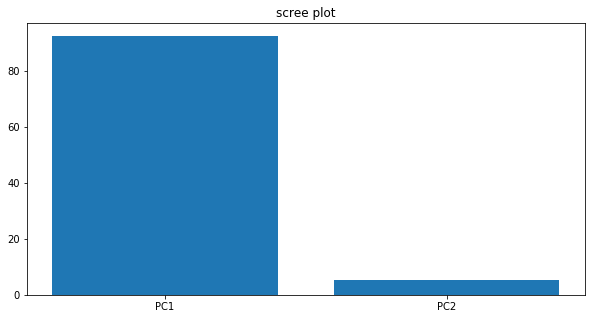

In [75]:
#components
principalComponents = pca.fit_transform(iris_data)

pca_vari = np.round(pca.explained_variance_ratio_ * 100, decimals = 4)
pca_labels = ['PC' + str(x) for x in range(1, len(pca_vari)+1)]

plt.figure(figsize=(10,5))
plt.bar(pca_labels, pca_vari)
plt.title('scree plot')
plt.show()


Text(0.5, 1.0, 'PCA of iris')

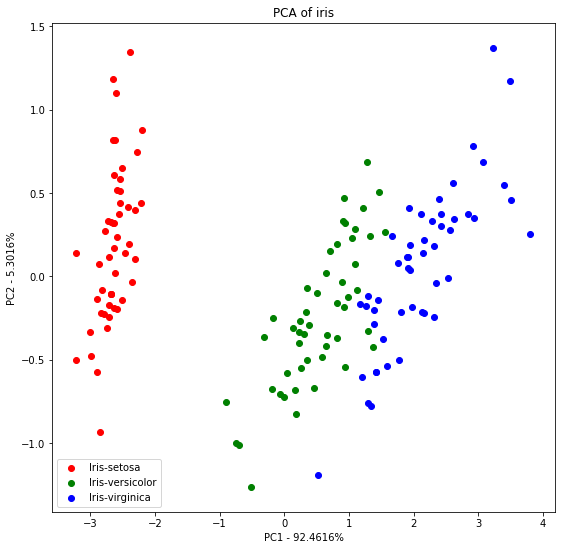

In [76]:
iris_pca = pd.DataFrame(data=iris_pca, columns=pca_labels)
iris_pca['target'] = iris_names

plt.figure(figsize=(9,9))

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color = ['r','g','b']

for target, color in zip(species,color):
    spec = iris_pca.target == target
    plt.scatter(iris_pca.loc[spec, 'PC1'], iris_pca.loc[spec, 'PC2'], c = color)

plt.legend(species)     
plt.xlabel('PC1 - ' + str(pca_vari[0]) + '%')
plt.ylabel('PC2 - ' + str(pca_vari[1]) + '%')
plt.title('PCA of iris')


**Nearest Neighbor Classification**

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

iris_train, iris_test = train_test_split(iris_pca, test_size=0.5)

predictor = KNeighborsClassifier(n_neighbors=5)
predictor.fit(iris_train[['PC1','PC2']], iris_train['target'])

predictions = predictor.predict(iris_test[['PC1','PC2']])

print(accuracy_score(iris_test.target, predictions))

0.9733333333333334


Prediction Function

In [80]:
def predict_flower(sepal_len, sepal_wid, petal_len, petal_wid):
    """Predicts Target from measurements"""
    iris_predict = pd.DataFrame(iris_data.copy())
    iris_target = pd.DataFrame(iris_names.copy())
    
    data = np.array([sepal_len, sepal_wid, petal_len, petal_wid])
    iris_predict = np.vstack((iris_predict, data))
    predict_pca = pca.fit_transform(iris_predict)
    prediction = predictor.predict(predict_pca)
    
    return(prediction[-1])

predict_flower(5.0, 3.2, 1.3, 0.1)

'Iris-setosa'